In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

%matplotlib inline
plt.rcParams["figure.figsize"] = (15,10)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [2]:
df = pd.read_excel("auto_complectations.xlsx")
df.head()

,brand,model,complect,type_car,seats,doors,Двигатель,Мощность,Крутящий момент двигателя,Коробка передач,Привод,Разгон до сотни,Максимальная скорость,Расход топлива (л/100 км)\nгород / трасса / смешанный,Дорожный просвет,Габариты (длина × ширина × высота),Колёсная база,Объём багажника,Объём багажника максимальный,Объём топливного бака,Масса автомобиля
0,Audi,A3 Sedan,1.4 TFSI 7AMT,Седан класса C,5,4,бензиновый (1395 см³),150 л. с.,250 Н·м,роботизированная (7 ступеней),передний,8.2 секунды,224 км/ч,5.9 / 4.1 / 4.8,165 мм,4458 × 1796 × 1416,2637 мм,425 л,880 л,50 л,1320 кг
1,Audi,A3 Sedan,sport 1.4 TFSI 7AMT,Седан класса C,5,4,бензиновый (1395 см³),150 л. с.,250 Н·м,роботизированная (7 ступеней),передний,8.2 секунды,224 км/ч,5.9 / 4.1 / 4.8,165 мм,4458 × 1796 × 1416,2637 мм,425 л,880 л,50 л,1320 кг
2,Audi,A3 Sedan,2.0 TFSI 7AMT,Седан класса C,5,4,бензиновый (1984 см³),190 л. с.,320 Н·м,роботизированная (7 ступеней),передний,6.8 секунды,250 км/ч,7.2 / 4.7 / 5.6,165 мм,4458 × 1796 × 1416,2637 мм,425 л,880 л,50 л,1395 кг
3,Audi,A3 Sedan,2.0 TFSI 7AMT quattro,Седан класса C,5,4,бензиновый (1984 см³),190 л. с.,320 Н·м,роботизированная (7 ступеней),полный,6.2 секунды,242 км/ч,7.2 / 4.8 / 5.7,165 мм,4458 × 1796 × 1416,2637 мм,390 л,845 л,55 л,1465 кг
4,Audi,A3 Sedan,sport 2.0 TFSI 7AMT,Седан класса C,5,4,бензиновый (1984 см³),190 л. с.,320 Н·м,роботизированная (7 ступеней),передний,6.8 секунды,242 км/ч,7.2 / 4.7 / 5.6,165 мм,4458 × 1796 × 1416,2637 мм,425 л,880 л,50 л,1395 кг


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1703 entries, 0 to 1702
Data columns (total 21 columns):
 #   Column                                                Non-Null Count  Dtype 
---  ------                                                --------------  ----- 
 0   brand                                                 1703 non-null   object
 1   model                                                 1703 non-null   object
 2   complect                                              1703 non-null   object
 3   type_car                                              1703 non-null   object
 4   seats                                                 1703 non-null   int64 
 5   doors                                                 1703 non-null   int64 
 6   Двигатель                                             1703 non-null   object
 7   Мощность                                              1703 non-null   object
 8   Крутящий момент двигателя                             1703 non-null 

1. Необходимо обработать данные, привести к соответствующим типам и выделить новые признаки из уже имеющихся (двигатель -> [тип двигателя, объем двигателя])

In [4]:
rm_dict = {
    'brand': 'Марка',
    'model': 'Модель',
    'complect': 'Комплект',
    'type_car': 'Тип автомобиля',
    'seats': 'Сиденья',
    'doors': 'Двери'
}
df = df.rename(columns=rm_dict)

In [5]:
def check_type(type_str, types):
    list_str = type_str.lower().split()
    for string in list_str:
        if string in types:
            return string
    return None

def parse_categories(input_series, types):
    types_out = []
    for type_str in input_series:
        car_type = check_type(type_str, types)
        types_out.append(car_type)
    return pd.Series(types_out)

#Седан - Хетчбек - Кроссовер - Внедорожник
car_types = [
    "кроссовер",
    "хэтчбек",
    "седан",
    "внедорожник"]
df["Тип автомобиля"] = parse_categories(df["Тип автомобиля"], car_types)

transmition_types = [
    "автоматическая",
    "роботизированная",
    "механическая",
    "вариатор"]

df["Коробка передач"] = parse_categories(df["Коробка передач"], transmition_types)

In [6]:
def parse_engine_str(engine_str):
    engine_str_list = engine_str.split()
    return (engine_str_list[0], np.float64(engine_str_list[1][1:]))
    
def parse_engine_type(engine_series):
    engine_out = []
    for index, engine_str in enumerate(engine_series):
        engine_out.append(parse_engine_str(engine_str))
    return pd.DataFrame(engine_out, columns=["Тип Двигателя", "Объем двигателя"])

df_engine = parse_engine_type(df["Двигатель"])
df = pd.concat([df, df_engine], axis=1, join="inner")
df = df.drop(columns=["Двигатель"])

In [7]:
#engine power
def parse_str_to_float(power_series):
    out = np.empty((power_series.size))
    for index, _str in enumerate(power_series):
        try:
            out[index] = np.float64(_str.split()[0])
        except ValueError:
            out[index] = np.nan
    return pd.Series(out)

names = [
    "Мощность",
    "Крутящий момент двигателя",
    "Разгон до сотни",
    "Максимальная скорость",
    "Дорожный просвет",
    "Колёсная база",
    "Объём багажника",
    "Объём багажника максимальный",
    "Объём топливного бака",
    "Масса автомобиля",
]

for name in names:
    df[name] = parse_str_to_float(df[name])

In [8]:
def parse_str_to_3float(series, split_char, column_names):
    out = []
    for _str in series:
        try:
            out.append(np.float64(_str.split(split_char)))
        except ValueError:
            out.append(np.na)
    return pd.DataFrame(out, columns=column_names)

df_fuel_consumption = parse_str_to_3float(df["Расход топлива (л/100 км)\nгород / трасса / смешанный"], '/', ["Расход город", "Расход трасса", "Расход смешанный"])
df_dimensions = parse_str_to_3float(df["Габариты (длина × ширина × высота)"], '×', ["Длина", "Ширина", "Высота"])
df = pd.concat([df, df_fuel_consumption], axis=1, join="inner")
df = pd.concat([df, df_dimensions], axis=1, join="inner")
df = df.drop(columns=["Расход топлива (л/100 км)\nгород / трасса / смешанный", "Габариты (длина × ширина × высота)"])
df

,Марка,Модель,Комплект,Тип автомобиля,Сиденья,Двери,Мощность,Крутящий момент двигателя,Коробка передач,Привод,Разгон до сотни,Максимальная скорость,Дорожный просвет,Колёсная база,Объём багажника,Объём багажника максимальный,Объём топливного бака,Масса автомобиля,Тип Двигателя,Объем двигателя,Расход город,Расход трасса,Расход смешанный,Длина,Ширина,Высота
0,Audi,A3 Sedan,1.4 TFSI 7AMT,седан,5,4,150.0,250.0,роботизированная,передний,8.2,224.0,165.0,2637.0,425.0,880.0,50.0,1320.0,бензиновый,1395.0,5.9,4.1,4.8,4458.0,1796.0,1416.0
1,Audi,A3 Sedan,sport 1.4 TFSI 7AMT,седан,5,4,150.0,250.0,роботизированная,передний,8.2,224.0,165.0,2637.0,425.0,880.0,50.0,1320.0,бензиновый,1395.0,5.9,4.1,4.8,4458.0,1796.0,1416.0
2,Audi,A3 Sedan,2.0 TFSI 7AMT,седан,5,4,190.0,320.0,роботизированная,передний,6.8,250.0,165.0,2637.0,425.0,880.0,50.0,1395.0,бензиновый,1984.0,7.2,4.7,5.6,4458.0,1796.0,1416.0
3,Audi,A3 Sedan,2.0 TFSI 7AMT quattro,седан,5,4,190.0,320.0,роботизированная,полный,6.2,242.0,165.0,2637.0,390.0,845.0,55.0,1465.0,бензиновый,1984.0,7.2,4.8,5.7,4458.0,1796.0,1416.0
4,Audi,A3 Sedan,sport 2.0 TFSI 7AMT,седан,5,4,190.0,320.0,роботизированная,передний,6.8,242.0,165.0,2637.0,425.0,880.0,50.0,1395.0,бензиновый,1984.0,7.2,4.7,5.6,4458.0,1796.0,1416.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1698,Volvo,XC90,D5 AT 5S R-Design,кроссовер,5,5,235.0,480.0,автоматическая,полный,7.8,220.0,237.0,2984.0,721.0,1899.0,71.0,1969.0,дизельный,1969.0,6.4,5.5,5.8,4950.0,2008.0,1776.0
1699,Volvo,XC90,T6 AT 7S R-Design,кроссовер,7,5,320.0,400.0,автоматическая,полный,6.5,230.0,237.0,2984.0,692.0,1899.0,71.0,2004.0,бензиновый,1969.0,0.0,0.0,8.3,4950.0,2008.0,1776.0
1700,Volvo,XC90,D5 AT 7S R-Design,кроссовер,7,5,235.0,480.0,автоматическая,полный,7.8,220.0,237.0,2984.0,692.0,1899.0,71.0,2009.0,дизельный,1969.0,6.4,5.5,5.8,4950.0,2008.0,1776.0
1701,Volvo,XC90,T8 AT 7S Inscription,кроссовер,7,5,407.0,640.0,автоматическая,полный,5.6,230.0,237.0,2984.0,640.0,1899.0,70.0,2350.0,гибридный,1969.0,0.0,0.0,2.1,4950.0,2008.0,1776.0


2. Проанализируем данные. Выделим числоввые признаки и удалим линейно зависимые. Т.к. линейно зависимые повышают размерность данных, но не вносят дополнительной информации.  

In [9]:
numerical_features = [x for x in df.columns if(  df[x].dtype == np.float64)]
numerical_features

['Мощность',
 'Крутящий момент двигателя',
 'Разгон до сотни',
 'Максимальная скорость',
 'Дорожный просвет',
 'Колёсная база',
 'Объём багажника',
 'Объём багажника максимальный',
 'Объём топливного бака',
 'Масса автомобиля',
 'Объем двигателя',
 'Расход город',
 'Расход трасса',
 'Расход смешанный',
 'Длина',
 'Ширина',
 'Высота']

Построим корреляционную матрицу, чтобы найти линейно зависимые признаки 

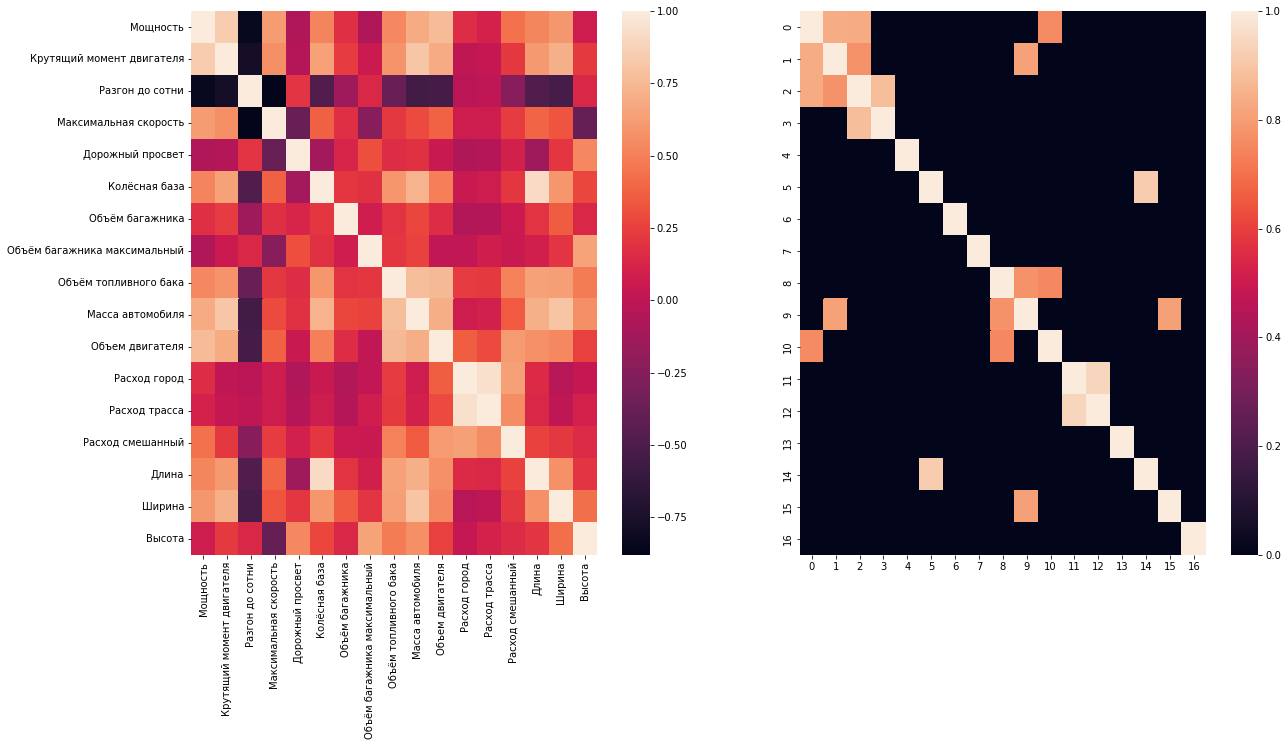

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

corr_matrix = df[numerical_features].corr()
corr_matrix_abs = np.abs(corr_matrix)
corr_matrix_abs = np.where(corr_matrix_abs > 0.75, corr_matrix_abs, 0)
sns.heatmap(corr_matrix, ax=axes[0])
sns.heatmap(corr_matrix_abs, ax=axes[1])

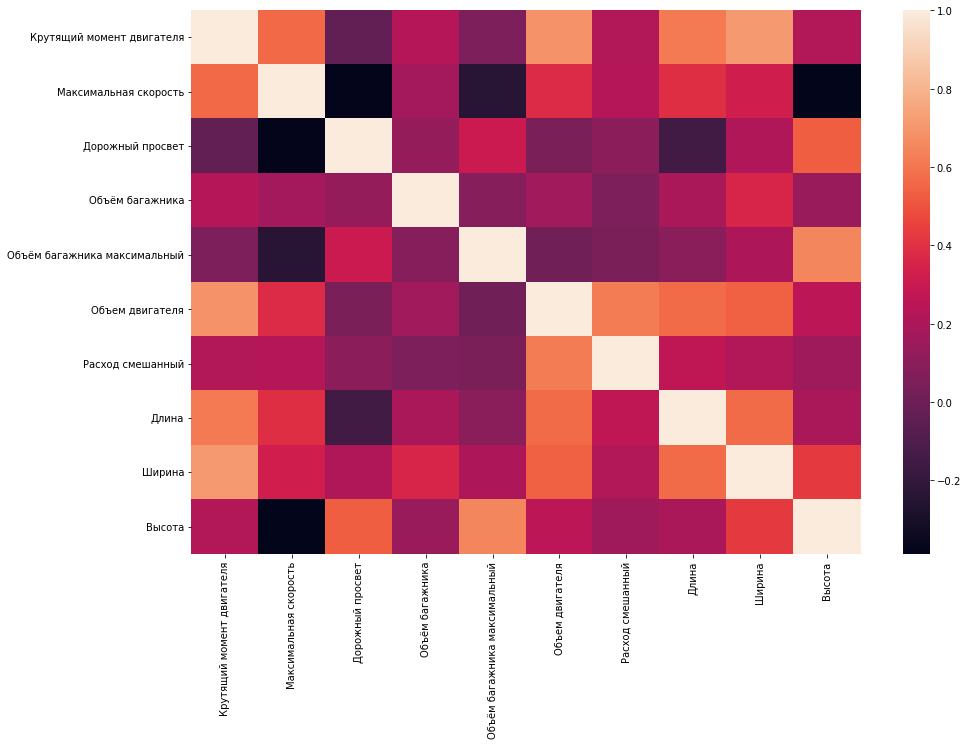

In [11]:
extra_columns =  ["Мощность", "Расход город","Расход трасса", "Объём топливного бака", "Разгон до сотни", "Колёсная база", "Масса автомобиля"]
numerical_features = [i for i in numerical_features if i not in extra_columns]
corr_matrix = df[numerical_features].corr()
sns.heatmap(corr_matrix)

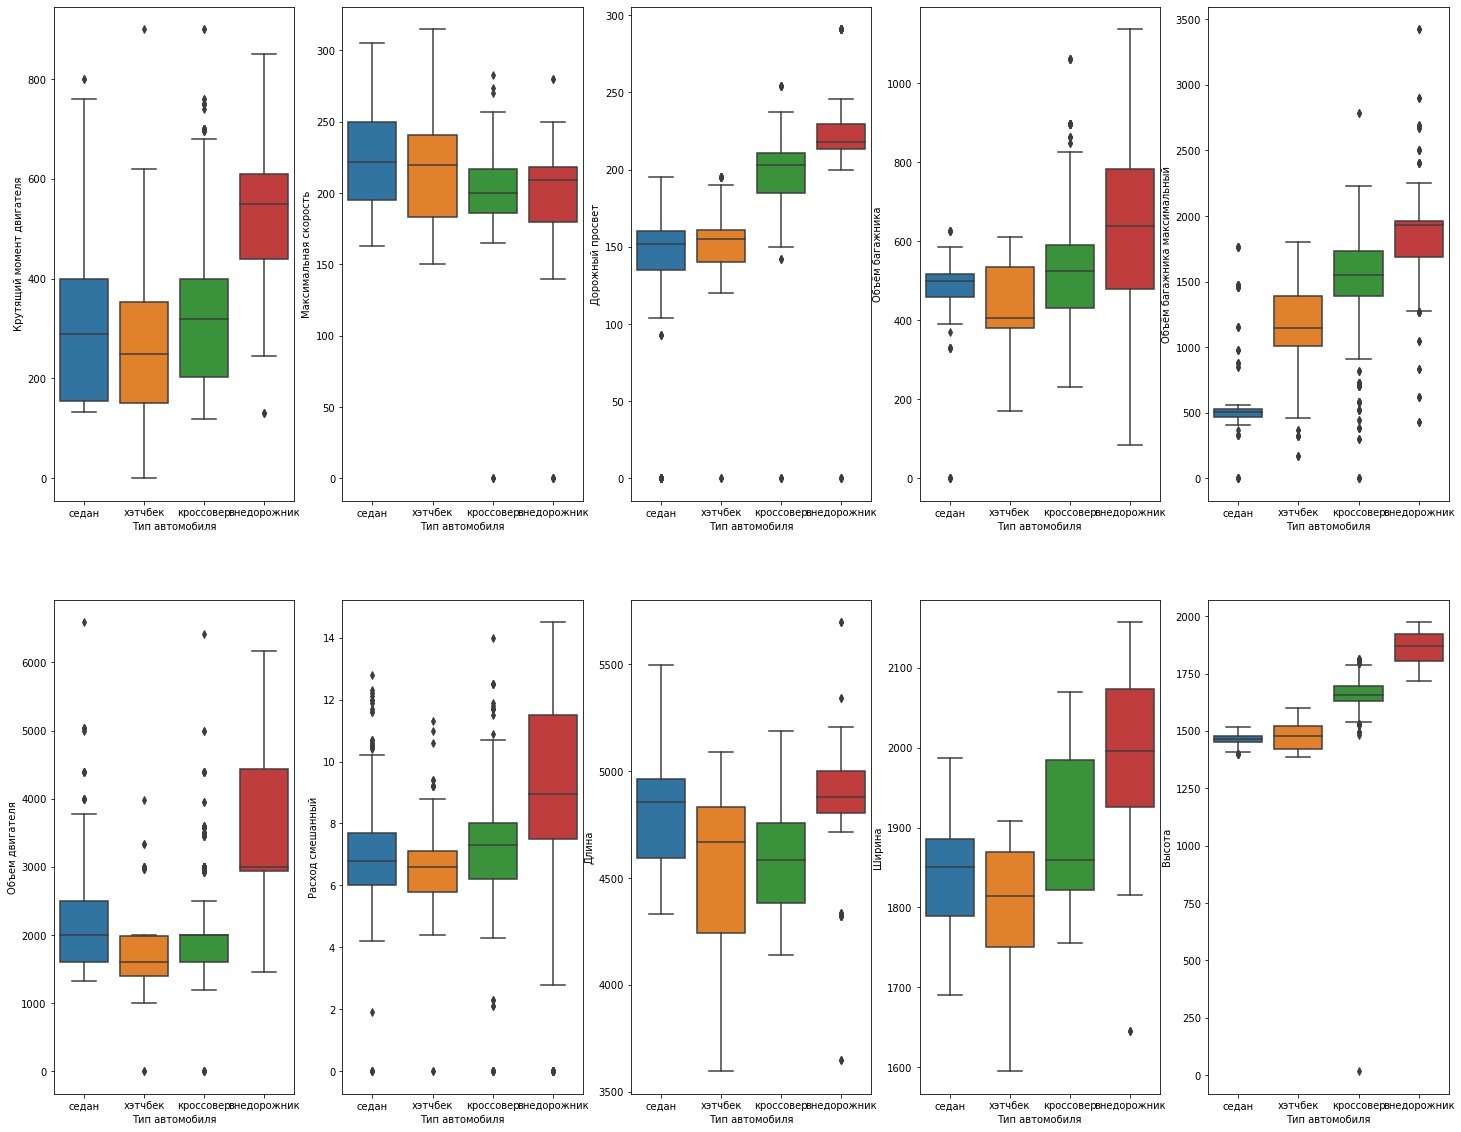

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(25, 20))

for idx, feat in  enumerate(numerical_features):
    sns.boxplot(x='Тип автомобиля', y=feat, data=df,ax=axes[int(idx / 5), idx % 5])
    axes[int(idx / 5), idx % 5].set_xlabel('Тип автомобиля')
    axes[int(idx / 5), idx % 5].set_ylabel(feat)

По графикам видно, что по признакам Высота, Объем багажника максимальный, Дорожный просвет, данные хорошо разделяются на классы.

Теперь оценим категориальные признаки

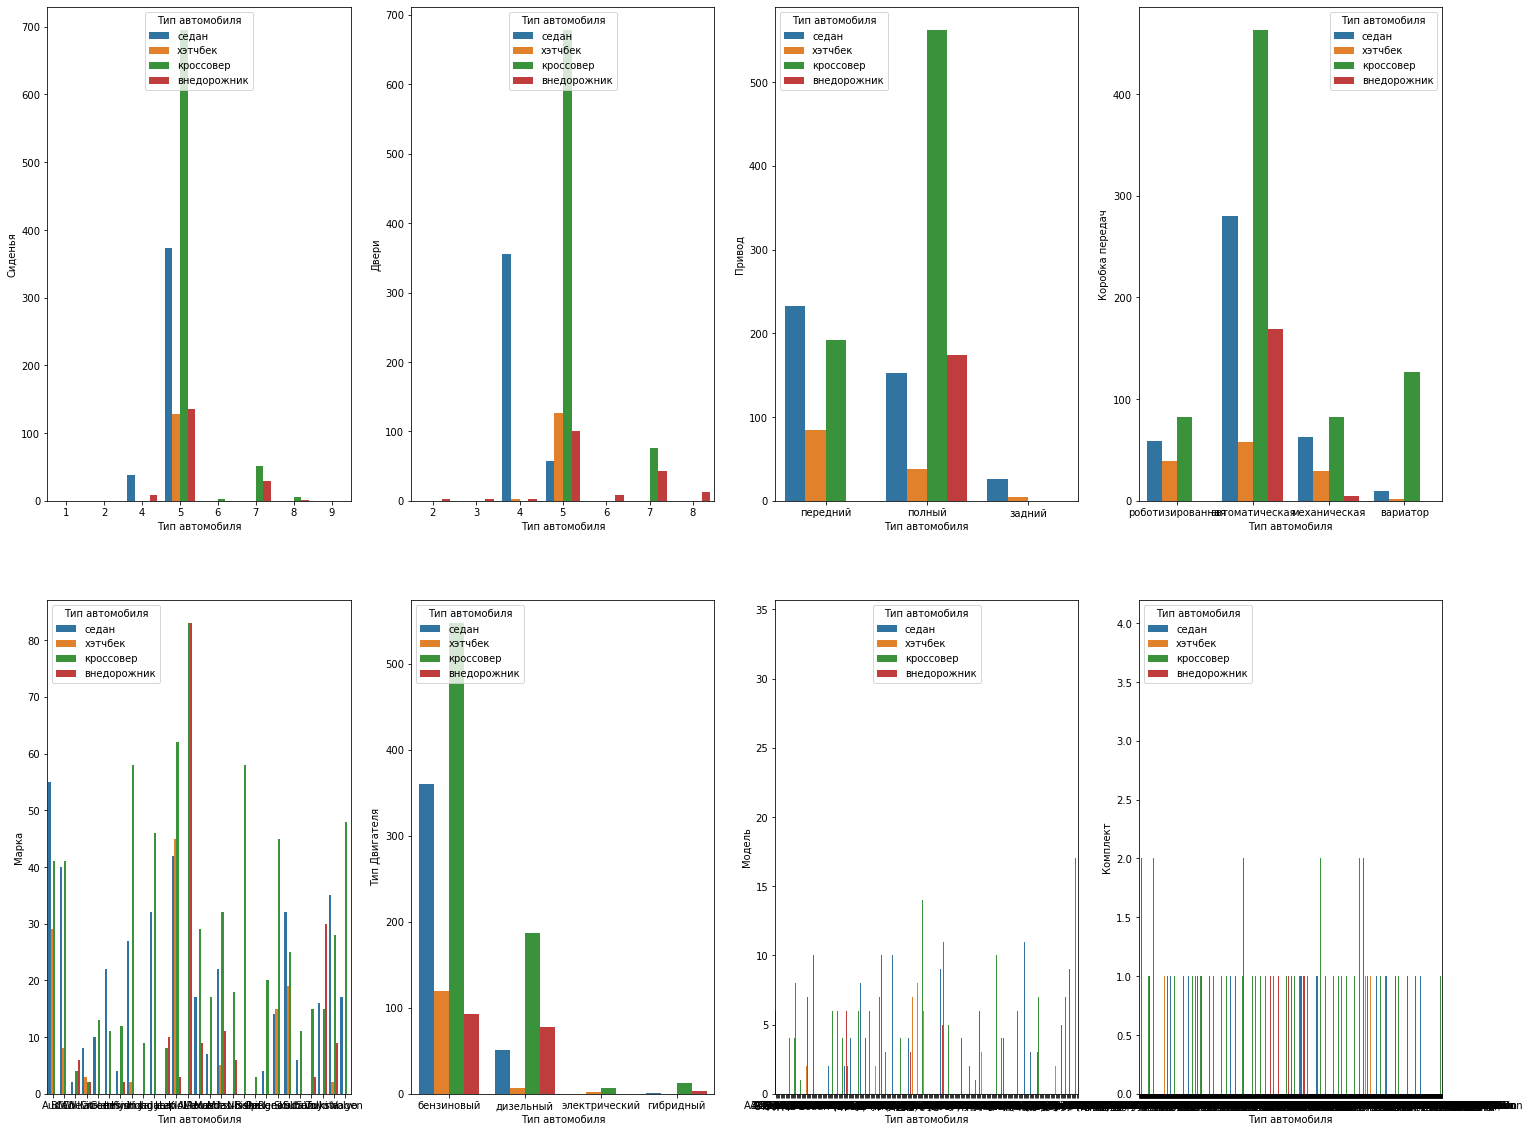

In [13]:
categorical_features = ["Сиденья", "Двери", "Привод", "Коробка передач", "Марка", "Тип Двигателя", "Модель", "Комплект"] 
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(25, 20))

for idx, feat in  enumerate(categorical_features):
    sns.countplot(x=feat, hue='Тип автомобиля', data=df,ax=axes[int(idx / 4), idx % 4])
    axes[int(idx / 4), idx % 4].set_xlabel('Тип автомобиля')
    axes[int(idx / 4), idx % 4].set_ylabel(feat)

Видно, что для признаков Марка, Модель, Комплект нет четких паттернов, значит эти признаки нам не подходят 

In [14]:
all_extra_feat = ["Тип Двигателя", "Марка", "Мощность", "Расход город","Расход трасса", "Объём топливного бака", "Разгон до сотни", "Колёсная база", "Масса автомобиля", "Модель", "Комплект"]
X = df.drop(all_extra_feat, axis=1)
X = X.dropna()

X['Коробка передач'] = pd.factorize(X['Коробка передач'])[0]
X['Привод'] = pd.factorize(X['Привод'])[0]
factorize_type = pd.factorize(X["Тип автомобиля"])
X["Тип автомобиля"] = factorize_type[0]
y = X["Тип автомобиля"]
X = X.drop(["Тип автомобиля"], axis=1)

Теперь необходимо обучить модель, рассмотрим несколько алгоритмов и посмотрим какой алгоритм лучше интерпретирует данные

In [15]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, classification_report
from sklearn.model_selection import GridSearchCV, cross_val_score


tree = DecisionTreeClassifier( max_depth=10, random_state=23)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=48)
cross_val_score(tree, X_train, y_train, cv=5)

tree.fit(X_train, y_train)
tree_pred = tree.predict(X_test)
precision_score(y_test, tree_pred, average=None)

array([0.99186992, 0.97674419, 1.        , 0.96428571])

Для оценки работы алгоритма многоклассовой классификации используем метрику "точность" и "полноту"

In [16]:
export_graphviz(tree, feature_names=X.columns, 
out_file='car_tree.dot', filled=True)
!dot -Tpng 'car_tree.dot' -o 'car_tree.png'

In [17]:
report = classification_report(y_test, tree.predict(X_test))
print(report)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       122
           1       0.98      1.00      0.99        42
           2       1.00      0.98      0.99       223
           3       0.96      1.00      0.98        54

    accuracy                           0.99       441
   macro avg       0.98      1.00      0.99       441
weighted avg       0.99      0.99      0.99       441



Теперь необходимо подобрать оптимальные гиперпараметры

In [18]:
tree = DecisionTreeClassifier()
tree_params = {'criterion':['entropy', 'gini'], 'max_depth': range(1,11)}

tree_grid = GridSearchCV(tree, tree_params,
                         cv=5,
                         n_jobs=-1, verbose=True)

tree_grid.fit(X_train, y_train)
print( tree_grid.best_params_, tree_grid.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
{'criterion': 'gini', 'max_depth': 7} 0.9922188017996685


In [19]:
precision_score(y_test, tree_grid.predict(X_test), average=None)

array([0.99186992, 0.97674419, 1.        , 0.96428571])

In [20]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train, y_train)
precision_score(y_test, knn.predict(X_test), average=None)

array([0.92063492, 0.775     , 0.88607595, 0.89473684])

In [21]:
report = classification_report(y_test, knn.predict(X_test))
print(report)

              precision    recall  f1-score   support

           0       0.92      0.95      0.94       122
           1       0.78      0.74      0.76        42
           2       0.89      0.94      0.91       223
           3       0.89      0.63      0.74        54

    accuracy                           0.89       441
   macro avg       0.87      0.82      0.84       441
weighted avg       0.89      0.89      0.88       441



In [22]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

knn_pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_jobs=-1))])
knn_params = {'knn__n_neighbors': range(1, 15),
              'knn__weights':['uniform', 'distance'],
              'knn__metric': ['euclidean', 'euclidean', 'minkowski']}
knn_grid = GridSearchCV(knn_pipe, knn_params,
                        cv=5, n_jobs=-1,
                        verbose=True)

In [23]:
knn_grid.fit(X_train, y_train)
knn_grid.best_params_, knn_grid.best_score_

Fitting 5 folds for each of 84 candidates, totalling 420 fits


({'knn__metric': 'euclidean',
  'knn__n_neighbors': 6,
  'knn__weights': 'distance'},
 0.9766327255505566)

In [24]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=17)
cvs = cross_val_score(forest, X_train, y_train, cv=5)
cvs

array([1.        , 0.99029126, 1.        , 0.99512195, 0.99512195])

In [25]:
forest_params = {'criterion':['entropy', 'gini'], 'max_depth': range(1,11)}
forest_grid = GridSearchCV(forest, forest_params,
                            cv=5, n_jobs=-1,
                            verbose=True)
forest_grid.fit(X_train, y_train)
forest_grid.best_params_, forest_grid.best_score_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


({'criterion': 'gini', 'max_depth': 8}, 0.9970779067013972)

In [26]:
precision_score(y_test, forest_grid.predict(X_test), average=None)

array([1., 1., 1., 1.])

По результатам проверки лучшую точность показал алгоритм Random Forest 0.997